# 5. Sensor Data Semi-Supervised Classification

In [1]:
from datetime import datetime
import random
import math
import os

from IPython.display import clear_output, display
from tqdm import tqdm

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import ruptures as rpt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
ANON_HIGH_RES_DATASET = "../data/Anonymized High Resolution Dataset (8 Days).csv"
ANON_HIGH_RES_LABELS = "../data/Anonymized High Resolution Dataset (8 Days) (Labels).csv"

TEXT_BOLD = "\033[1m"
TEXT_END = "\033[0m"

## 5.1 Import datasets

In [3]:
df_anon_high_res = pd.read_csv(ANON_HIGH_RES_DATASET, sep=';')

## 5.2 Preprocess data

### 5.2.1 Prepare data

**Rename columns**

In [4]:
df_anon_high_res = df_anon_high_res.rename(columns={
    "TS": "timestamp",
    "Tag": "sensor_tag",
    "Value": "value",
    "Sensor Type": "sensor_type",
    "Equipment Type": "equipment_type",
})

**Set categorical values**

In [5]:
df_anon_high_res["sensor_tag"] = df_anon_high_res["sensor_tag"].str.split(" ").apply(lambda x: f"{x[0].upper()}_{x[1].zfill(2)}")
df_anon_high_res["sensor_type"] = df_anon_high_res["sensor_type"].str.upper()
df_anon_high_res["equipment_type"] = df_anon_high_res["equipment_type"].str.upper()

In [6]:
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_01", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_02", "sensor_type"] = "FLOW"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_03", "sensor_type"] = "COUNTER"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_04", "sensor_type"] = "UNKNOWN"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_05", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_06", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_07", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_08", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_09", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_10", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_11", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_12", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_13", "sensor_type"] = "MEASUREMENT"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_14", "sensor_type"] = "SETTING"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_15", "sensor_type"] = "TEMPERATURE"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_16", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_17", "sensor_type"] = "ACTUAL"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_18", "sensor_type"] = "SPEED"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_19", "sensor_type"] = "ACTUAL"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_20", "sensor_type"] = "SPEED"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_21", "sensor_type"] = "PERCENTAGE"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_22", "sensor_type"] = "CURRENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_23", "sensor_type"] = "FREQUENCY"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_24", "sensor_type"] = "TEMPERATURE"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_25", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_26", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_27", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_28", "sensor_type"] = "FLOW"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_29", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_30", "sensor_type"] = "TEMPERATURE"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_31", "sensor_type"] = "SETTING"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_32", "sensor_type"] = "SETTING"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_33", "sensor_type"] = "SETTING"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_34", "sensor_type"] = "SETTING"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_35", "sensor_type"] = "SETTING"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_36", "sensor_type"] = "SETTING"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_37", "sensor_type"] = "SETTING"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_38", "sensor_type"] = "SETTING"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_39", "sensor_type"] = "PRESSURE"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_40", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_41", "sensor_type"] = "PRESSURE"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_42", "sensor_type"] = "TEMPERATURE"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_43", "sensor_type"] = "PRESSURE"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_44", "sensor_type"] = "TEMPERATURE"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_45", "sensor_type"] = "FREQUENCY"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_46", "sensor_type"] = "FREQUENCY"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_47", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_48", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_49", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_50", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_51", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_52", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_53", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_54", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_55", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_56", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_57", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_58", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_59", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_60", "sensor_type"] = "FLOW"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_61", "sensor_type"] = "SPEED"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_62", "sensor_type"] = "PERCENTAGE"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_63", "sensor_type"] = "TIME"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_64", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_65", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_66", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_67", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_68", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_69", "sensor_type"] = "FLOW"

In [7]:
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_15", "equipment_type"] = "TANK"

**Set data types**

In [8]:
df_anon_high_res["timestamp"] = pd.to_datetime(df_anon_high_res["timestamp"])
df_anon_high_res["sensor_tag"] = df_anon_high_res["sensor_tag"].astype("category")
df_anon_high_res["value"] = df_anon_high_res["value"].astype("float")
df_anon_high_res["sensor_type"] = df_anon_high_res["sensor_type"].astype("category")
df_anon_high_res["equipment_type"] = df_anon_high_res["equipment_type"].astype("category")

### 5.2.2 Clean data

**Remove duplicate rows**

In [9]:
print(f"Rows (Before): {df_anon_high_res.shape[0]}")
df_anon_high_res = df_anon_high_res.drop_duplicates(subset = ['timestamp', 'sensor_tag'], keep=False)
print(f"Rows (After): {df_anon_high_res.shape[0]}")

Rows (Before): 1416864
Rows (After): 1416381


**Remove missing data**

In [10]:
print(f"Rows (Before): {df_anon_high_res.shape[0]}")
df_anon_high_res = df_anon_high_res.dropna(subset="value")
print(f"Rows (After): {df_anon_high_res.shape[0]}")

Rows (Before): 1416381
Rows (After): 1393345


**Remove unused sensors**

In [11]:
exclude = [
    # Invalid sensors
    "SENSOR_04", # No variation
    "SENSOR_05", # Irregular lab measurements
    "SENSOR_06", # Irregular lab measurements
    "SENSOR_07", # Irregular lab measurements
    "SENSOR_08", # Irregular lab measurements
    "SENSOR_09", # Irregular lab measurements
    "SENSOR_10", # Irregular lab measurements
    "SENSOR_11", # Irregular lab measurements
    "SENSOR_12", # Irregular lab measurements
    "SENSOR_13", # Irregular lab measurements
    "SENSOR_14", # Ignore this sensor (Arjen)
    "SENSOR_17", # No data points
    "SENSOR_18", # No data points
    "SENSOR_19", # No data points
    "SENSOR_20", # No data points
    "SENSOR_46", # No variation
    "SENSOR_50", # No variation
    "SENSOR_54", # No variation

    # Coherent sensors
    "SENSOR_23", # Similar to Sensor 22
    "SENSOR_26", # Similar to Sensor 22
    "SENSOR_27", # Similar to Sensor 22
    "SENSOR_32", # Similar to Sensor 31
    "SENSOR_33", # Similar to Sensor 32
    "SENSOR_34", # Similar to Sensor 33
    "SENSOR_36", # Similar to Sensor 35
    "SENSOR_37", # Similar to Sensor 35
    "SENSOR_38", # Similar to Sensor 35
    "SENSOR_41", # Similar to Sensor 39
    "SENSOR_43", # Similar to Sensor 39
    "SENSOR_44", # Similar to Sensor 42
    "SENSOR_52", # Similar to Sensor 48
    "SENSOR_53", # Similar to Sensor 49
    "SENSOR_55", # Similar to Sensor 51
    "SENSOR_56", # Similar to Sensor 52
    "SENSOR_57", # Similar to Sensor 53
    "SENSOR_58", # Similar to Sensor 51
    "SENSOR_59", # Similar to Sensor 52
    "SENSOR_60", # Similar to Sensor 53
    "SENSOR_64", # Similar to Sensor 61
    "SENSOR_65", # Similar to Sensor 53
    "SENSOR_66", # Similar to Sensor 61
    "SENSOR_67", # Similar to Sensor 53
    "SENSOR_68", # Similar to Sensor 61
    "SENSOR_69", # Similar to Sensor 53
]

df_anon_high_res = df_anon_high_res[~df_anon_high_res["sensor_tag"].isin(exclude)]

**Reset index**

In [12]:
df_anon_high_res = df_anon_high_res.reset_index(drop=True)

**Sort rows**

In [13]:
df_anon_high_res = df_anon_high_res.sort_values(["sensor_tag", "timestamp"])

### 5.2.3 Interpolate data

In [14]:
%%time
# Set index to timestamp
df_anon_high_res.index = df_anon_high_res["timestamp"]
df_anon_high_res = df_anon_high_res.drop(["timestamp"], axis=1)

# Create dataframe and min/max dates
df_anon_high_res_interpolated = pd.DataFrame(columns=df_anon_high_res.columns)
df_anon_high_res_min_date = df_anon_high_res.index.min()
df_anon_high_res_max_date = df_anon_high_res.index.max()

for sensor_tag in tqdm(df_anon_high_res["sensor_tag"].unique()):
    df_subset = df_anon_high_res[df_anon_high_res["sensor_tag"] == sensor_tag]

    # Update min/max dates
    if df_subset.index.min() >= df_anon_high_res_min_date:
        df_anon_high_res_min_date = df_subset.index.min()
    if df_subset.index.max() <= df_anon_high_res_max_date:
        df_anon_high_res_max_date = df_subset.index.max()

    # Determine interpolation method
    if sensor_tag in [
        "SENSOR_01",
        "SENSOR_02",
        "SENSOR_28",
        "SENSOR_29",
        "SENSOR_31",
        "SENSOR_32",
        "SENSOR_33",
        "SENSOR_34",
        "SENSOR_35",
        "SENSOR_36",
        "SENSOR_37",
        "SENSOR_38",
        "SENSOR_40",
    ]:
        method = "ffill"
    else:
        method = "linear"

    # Interpolate data
    df_subset_interpolated = pd.DataFrame(df_subset["value"].resample("1S").interpolate(method))
    df_subset_interpolated["sensor_tag"] = sensor_tag
    df_subset_interpolated["sensor_type"] = df_subset["sensor_type"][0]
    df_subset_interpolated["equipment_type"] = df_subset["equipment_type"][0]

    # Add interpolated data
    df_anon_high_res_interpolated = pd.concat([df_anon_high_res_interpolated, df_subset_interpolated], axis=0)

# Set data types
df_anon_high_res_interpolated["sensor_tag"] = df_anon_high_res_interpolated["sensor_tag"].astype("category")
df_anon_high_res_interpolated["value"] = df_anon_high_res_interpolated["value"].astype("float")
df_anon_high_res_interpolated["sensor_type"] = df_anon_high_res_interpolated["sensor_type"].astype("category")
df_anon_high_res_interpolated["equipment_type"] = df_anon_high_res_interpolated["equipment_type"].astype("category")

# Restore index to range
print(f"Rows (Before): {df_anon_high_res_interpolated.shape[0]}")
df_anon_high_res_interpolated = df_anon_high_res_interpolated.reset_index(names="timestamp")
df_anon_high_res_interpolated = df_anon_high_res_interpolated[
    (df_anon_high_res_interpolated["timestamp"] >= df_anon_high_res_min_date)
    & (df_anon_high_res_interpolated["timestamp"] <= df_anon_high_res_max_date)
]
df_anon_high_res = df_anon_high_res.reset_index(names="timestamp")
print(f"Rows (After): {df_anon_high_res_interpolated.shape[0]}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:05<00:00,  4.44it/s]


Rows (Before): 17277547
Rows (After): 17274350
CPU times: user 6 s, sys: 2.1 s, total: 8.1 s
Wall time: 8.09 s


## 5.3 Explore data

### 5.3.1 Inspect rows

In [15]:
df_anon_high_res.head(10)

timestamp sensor_tag  value sensor_type equipment_type
0 2022-01-24 00:00:15  SENSOR_01    0.0        FLOW           PUMP
1 2022-01-24 00:02:15  SENSOR_01    0.0        FLOW           PUMP
2 2022-01-24 00:04:15  SENSOR_01    0.0        FLOW           PUMP
3 2022-01-24 00:06:15  SENSOR_01    0.0        FLOW           PUMP
4 2022-01-24 00:08:15  SENSOR_01    0.0        FLOW           PUMP
5 2022-01-24 00:10:15  SENSOR_01    0.0        FLOW           PUMP
6 2022-01-24 00:12:15  SENSOR_01    0.0        FLOW           PUMP
7 2022-01-24 00:14:15  SENSOR_01    0.0        FLOW           PUMP
8 2022-01-24 00:16:15  SENSOR_01    0.0        FLOW           PUMP
9 2022-01-24 00:18:15  SENSOR_01    0.0        FLOW           PUMP

In [16]:
df_anon_high_res_interpolated.head(10)

timestamp sensor_tag  value sensor_type equipment_type
102 2022-01-24 00:01:57  SENSOR_01    0.0        FLOW           PUMP
103 2022-01-24 00:01:58  SENSOR_01    0.0        FLOW           PUMP
104 2022-01-24 00:01:59  SENSOR_01    0.0        FLOW           PUMP
105 2022-01-24 00:02:00  SENSOR_01    0.0        FLOW           PUMP
106 2022-01-24 00:02:01  SENSOR_01    0.0        FLOW           PUMP
107 2022-01-24 00:02:02  SENSOR_01    0.0        FLOW           PUMP
108 2022-01-24 00:02:03  SENSOR_01    0.0        FLOW           PUMP
109 2022-01-24 00:02:04  SENSOR_01    0.0        FLOW           PUMP
110 2022-01-24 00:02:05  SENSOR_01    0.0        FLOW           PUMP
111 2022-01-24 00:02:06  SENSOR_01    0.0        FLOW           PUMP

### 5.3.2 Inspect data types

In [17]:
df_anon_high_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695392 entries, 0 to 695391
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       695392 non-null  datetime64[ns]
 1   sensor_tag      695392 non-null  category      
 2   value           695392 non-null  float64       
 3   sensor_type     695392 non-null  category      
 4   equipment_type  695392 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(1)
memory usage: 12.6 MB


In [18]:
df_anon_high_res_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17274350 entries, 102 to 17277459
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   timestamp       datetime64[ns]
 1   sensor_tag      category      
 2   value           float64       
 3   sensor_type     category      
 4   equipment_type  category      
dtypes: category(3), datetime64[ns](1), float64(1)
memory usage: 444.8 MB


### 5.3.3 Inspect basic statistics

In [19]:
df_anon_high_res.describe(include="all")

/tmp/ipykernel_94203/450524285.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_anon_high_res.describe(include="all")


timestamp sensor_tag          value sensor_type  \
count                695392     695392  695392.000000      695392   
unique               279502         25            NaN          10   
top     2022-01-24 17:48:02  SENSOR_03            NaN        FLOW   
freq                     19      86327            NaN      171536   
first   2022-01-24 00:00:07        NaN            NaN         NaN   
last    2022-01-31 23:59:57        NaN            NaN         NaN   
mean                    NaN        NaN    2020.235802         NaN   
std                     NaN        NaN    5803.468237         NaN   
min                     NaN        NaN     -60.344513         NaN   
25%                     NaN        NaN      44.327285         NaN   
50%                     NaN        NaN      72.787110         NaN   
75%                     NaN        NaN     244.570800         NaN   
max                     NaN        NaN   30012.000000         NaN   

       equipment_type  
count          695392  
unique              4  
top              TANK  
freq           230520  
first             NaN  
last              NaN  
mean              NaN  
std               NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               NaN  
max               NaN

In [20]:
df_anon_high_res_interpolated.describe(include="all")

/tmp/ipykernel_94203/4075979378.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_anon_high_res_interpolated.describe(include="all")


timestamp sensor_tag         value sensor_type  \
count              17274350   17274350  1.727435e+07    17274350   
unique               690974         25           NaN          10   
top     2022-01-24 00:01:57  SENSOR_01           NaN        FLOW   
freq                     25     690974           NaN     7600714   
first   2022-01-24 00:01:57        NaN           NaN         NaN   
last    2022-01-31 23:58:10        NaN           NaN         NaN   
mean                    NaN        NaN  7.834000e+02         NaN   
std                     NaN        NaN  3.709465e+03         NaN   
min                     NaN        NaN -6.034451e+01         NaN   
25%                     NaN        NaN  3.458984e+00         NaN   
50%                     NaN        NaN  4.993374e+01         NaN   
75%                     NaN        NaN  1.161334e+02         NaN   
max                     NaN        NaN  3.001200e+04         NaN   

       equipment_type  
count        17274350  
unique              4  
top             MIXER  
freq          6218766  
first             NaN  
last              NaN  
mean              NaN  
std               NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               NaN  
max               NaN

### 5.3.4 Inspect missing data

In [21]:
df_anon_high_res_percent_missing = (df_anon_high_res.isnull().sum() * 100) / len(df_anon_high_res)

df_anon_high_res_missing_data = pd.DataFrame({"PERCENT_MISSING": df_anon_high_res_percent_missing}, index=df_anon_high_res.columns)
df_anon_high_res_missing_data

PERCENT_MISSING
timestamp                   0.0
sensor_tag                  0.0
value                       0.0
sensor_type                 0.0
equipment_type              0.0

In [22]:
df_anon_high_res_interpolated_percent_missing = (df_anon_high_res_interpolated.isnull().sum() * 100) / len(df_anon_high_res_interpolated)

df_anon_high_res_interpolated_missing_data = pd.DataFrame(
    {"PERCENT_MISSING": df_anon_high_res_interpolated_percent_missing},
    index=df_anon_high_res_interpolated.columns,
)

df_anon_high_res_interpolated_missing_data

PERCENT_MISSING
timestamp                   0.0
sensor_tag                  0.0
value                       0.0
sensor_type                 0.0
equipment_type              0.0

### 5.3.5 Inspect data overview

In [23]:
def display_overview(df, subset=None, start=None, end=None):
    tags = [tag for tag in df["sensor_tag"].unique() if subset is None or tag in subset]
    start = start or df["timestamp"].min()
    end = end or df["timestamp"].max()
    overview = pd.DataFrame()

    for tag in tags:
        subset = df[(df["sensor_tag"] == tag) & (df["timestamp"] >= start) & (df["timestamp"] <= end)].copy()

        overview = pd.concat([overview, pd.DataFrame([{
            "SENSOR_TAG": tag,
            "SENSOR_TYPE": subset["sensor_type"].iloc[0] if len(subset["sensor_type"]) > 0 else np.nan,
            "EQUIPMENT_TYPE": subset["equipment_type"].iloc[0] if len(subset["equipment_type"]) > 0 else np.nan,
            "VALUE_MEAN": subset["value"].mean(),
            "VALUE_STD": subset["value"].std(),
            "VALUE_MIN": subset["value"].min(),
            "VALUE_25": subset["value"].quantile(0.25),
            "VALUE_50": subset["value"].quantile(0.50),
            "VALUE_75": subset["value"].quantile(0.75),
            "VALUE_MAX": subset["value"].max(),
            "TIMESTAMP_INTERVAL": (subset["timestamp"].max() - subset["timestamp"].min()) / len(subset),
        }])], ignore_index=True)

    with pd.option_context("display.max_rows", 70, "display.max_columns", 20):
        display(overview)


def plot_overview(df, subset=None, start=None, end=None, kind="line", normalize=False):
    tags = [tag for tag in df["sensor_tag"].unique() if subset is None or tag in subset]
    colors = plt.cm.get_cmap("tab20").colors
    start = start or df["timestamp"].min()
    end = end or df["timestamp"].max()

    fig, axes = plt.subplots(
        len(tags),
        1,
        figsize=(24, len(tags)),
        sharex=True,
        sharey=False,
    )

    for idx, tag in enumerate(tags):
        subset = df[(df["sensor_tag"] == tag) & (df["timestamp"] >= start) & (df["timestamp"] <= end)].copy()
        subset["sensor_tag"] = subset.apply(
            lambda row: f"{row['sensor_tag'].split('_')[1]}_{row['sensor_type']}_{row['equipment_type']}",
            axis=1,
        )

        if normalize:
            scaler = MinMaxScaler()
            values = scaler.fit_transform(subset["value"].to_numpy().reshape(-1, 1))
        else:
            values = subset["value"]

        fig.add_subplot(axes[idx])

        if kind == "line":
            plt.plot(
                subset["timestamp"],
                values,
                color=colors[idx % len(colors)],
                label=subset["sensor_tag"].iloc[0],
                marker=".",
            )
            plt.legend(loc="upper right")
        elif kind == "scatter":
            plt.scatter(
                subset["timestamp"],
                values,
                color=colors[idx % len(colors)],
                label=subset["sensor_tag"].iloc[0],
                marker=".",
            )
            plt.legend(loc="upper right")
        else:
            raise ValueError("'kind' must be either 'line' or 'scatter'")

    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.07)
    plt.margins(x=0, y=0)
    plt.show()


def plot_correlation(df, subset=None, start=None, end=None, freq=None):
    tags = [tag for tag in df["sensor_tag"].unique() if subset is None or tag in subset]
    start = start or df["timestamp"].min()
    end = end or df["timestamp"].max()

    subset = df[df["sensor_tag"].isin(tags) & (df["timestamp"] >= start) & (df["timestamp"] <= end)].copy()
    subset["sensor_tag"] = subset.apply(
        lambda row: f"{row['sensor_tag'].split('_')[1]}_{row['sensor_type']}_{row['equipment_type']}",
        axis=1,
    )

    pivot = subset.pivot_table(index="timestamp", columns="sensor_tag", values="value")
    pivot = pivot.reset_index()
    pivot = pivot.groupby("timestamp" if not freq else pd.Grouper(key="timestamp", freq=freq)).mean()

    _, ax = plt.subplots(figsize=(24, 24))

    sns.heatmap(
        pivot.corr(),
        vmax=1.0,
        cmap=sns.diverging_palette(220, 10, as_cmap=True),
        cbar=False,
        square=True,
        annot=True,
        ax=ax,
        linewidths=0.1,
        linecolor="white",
    )

    plt.tight_layout()
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()

In [24]:
%%time
display_overview(
    df_anon_high_res_interpolated,
    subset=None,
    start="2022-01-24 00:00:00",
    end="2022-01-27 23:59:59",
)

SENSOR_TAG  SENSOR_TYPE EQUIPMENT_TYPE    VALUE_MEAN    VALUE_STD  \
0   SENSOR_01         FLOW           PUMP    271.787168   215.801945   
1   SENSOR_02         FLOW           PUMP    445.028925    28.311681   
2   SENSOR_03      COUNTER        PRODUCT  16668.307674  9179.543753   
3   SENSOR_15  TEMPERATURE           TANK     61.671501     4.727286   
4   SENSOR_16         FLOW           PUMP    122.746771    11.801074   
5   SENSOR_21   PERCENTAGE           TANK     55.203115    31.709619   
6   SENSOR_22      CURRENT          MIXER    119.695106   100.921065   
7   SENSOR_24  TEMPERATURE          MIXER     54.807489     7.759769   
8   SENSOR_25         FLOW          MIXER      5.961904     4.328458   
9   SENSOR_28         FLOW          MIXER     37.986410     0.451288   
10  SENSOR_29         FLOW           PUMP      0.666209     0.471567   
11  SENSOR_30  TEMPERATURE           PUMP     92.370474     6.813160   
12  SENSOR_31      SETTING          MIXER      0.025058     0.156301   
13  SENSOR_35      SETTING          MIXER      0.974931     0.156336   
14  SENSOR_39     PRESSURE          MIXER     18.852722    23.807924   
15  SENSOR_40         FLOW          MIXER      4.830188     2.827927   
16  SENSOR_42  TEMPERATURE          MIXER     73.264275     9.101328   
17  SENSOR_45    FREQUENCY           TANK    -24.589768    29.430178   
18  SENSOR_47         FLOW           PUMP     41.183760     2.710723   
19  SENSOR_48         FLOW           PUMP    206.158022     8.144907   
20  SENSOR_49         FLOW           PUMP     76.966612    98.060170   
21  SENSOR_51         FLOW           PUMP     36.000532     2.381541   
22  SENSOR_61        SPEED           TANK    851.942081    89.232811   
23  SENSOR_62   PERCENTAGE           TANK     46.960611    27.147911   
24  SENSOR_63         TIME           TANK     74.422424    41.368935   

     VALUE_MIN     VALUE_25      VALUE_50      VALUE_75     VALUE_MAX  \
0    -1.000000     0.000000    399.000000    459.000000    476.000000   
1   339.000000   459.000000    459.000000    459.000000    476.000000   
2     2.000000  9190.000000  16789.000000  25446.666667  30012.000000   
3    39.197826    58.064823     62.418804     65.208766     76.074690   
4    81.153915   113.948760    117.569212    136.400925    146.679030   
5     2.855469     9.693185     69.934711     70.158533    102.998050   
6    -6.500000     0.133301    115.227148    238.586230    263.829590   
7    40.600000    48.900000     54.825000     62.692645     66.900000   
8     0.268448     2.598049      4.335333      8.946794     20.729033   
9    23.000000    38.000000     38.000000     38.000000     38.000000   
10    0.000000     0.000000      1.000000      1.000000      1.000000   
11   81.439060    87.181885     88.689509     99.611618    106.628044   
12    0.000000     0.000000      0.000000      0.000000      1.000000   
13    0.000000     1.000000      1.000000      1.000000      1.000000   
14    0.000000     3.260156      5.244141     48.219337     83.269530   
15    1.000000     1.000000      7.000000      7.000000      7.000000   
16   59.031910    64.938133     72.501831     82.656800     85.341470   
17  -60.344513   -60.294716      0.000000      0.000000      0.000000   
18   32.957985    40.392194     41.114567     42.674110     71.221123   
19  166.112630   204.915020    205.390780    205.390780    509.000000   
20    0.000000     0.000000      0.000000    201.672704    449.779900   
21   30.000400    35.533577     36.076390     36.866299     66.244020   
22  540.631300   784.807805    813.159620    955.674200   1033.148400   
23   -0.660303    29.148123     30.726719     70.024805     96.110010   
24    4.224090    45.042988     61.611183    109.272130    264.670400   

          TIMESTAMP_INTERVAL  
0  0 days 00:00:00.999997105  
1  0 days 00:00:00.999997105  
2  0 days 00:00:00.999997105  
3  0 days 00:00:00.999997105  
4  0 days 00:00:00.999997105  
5  0 days 00:00:00.999997105  
6  0 days 00:0

CPU times: user 2.38 s, sys: 0 ns, total: 2.38 s
Wall time: 2.38 s


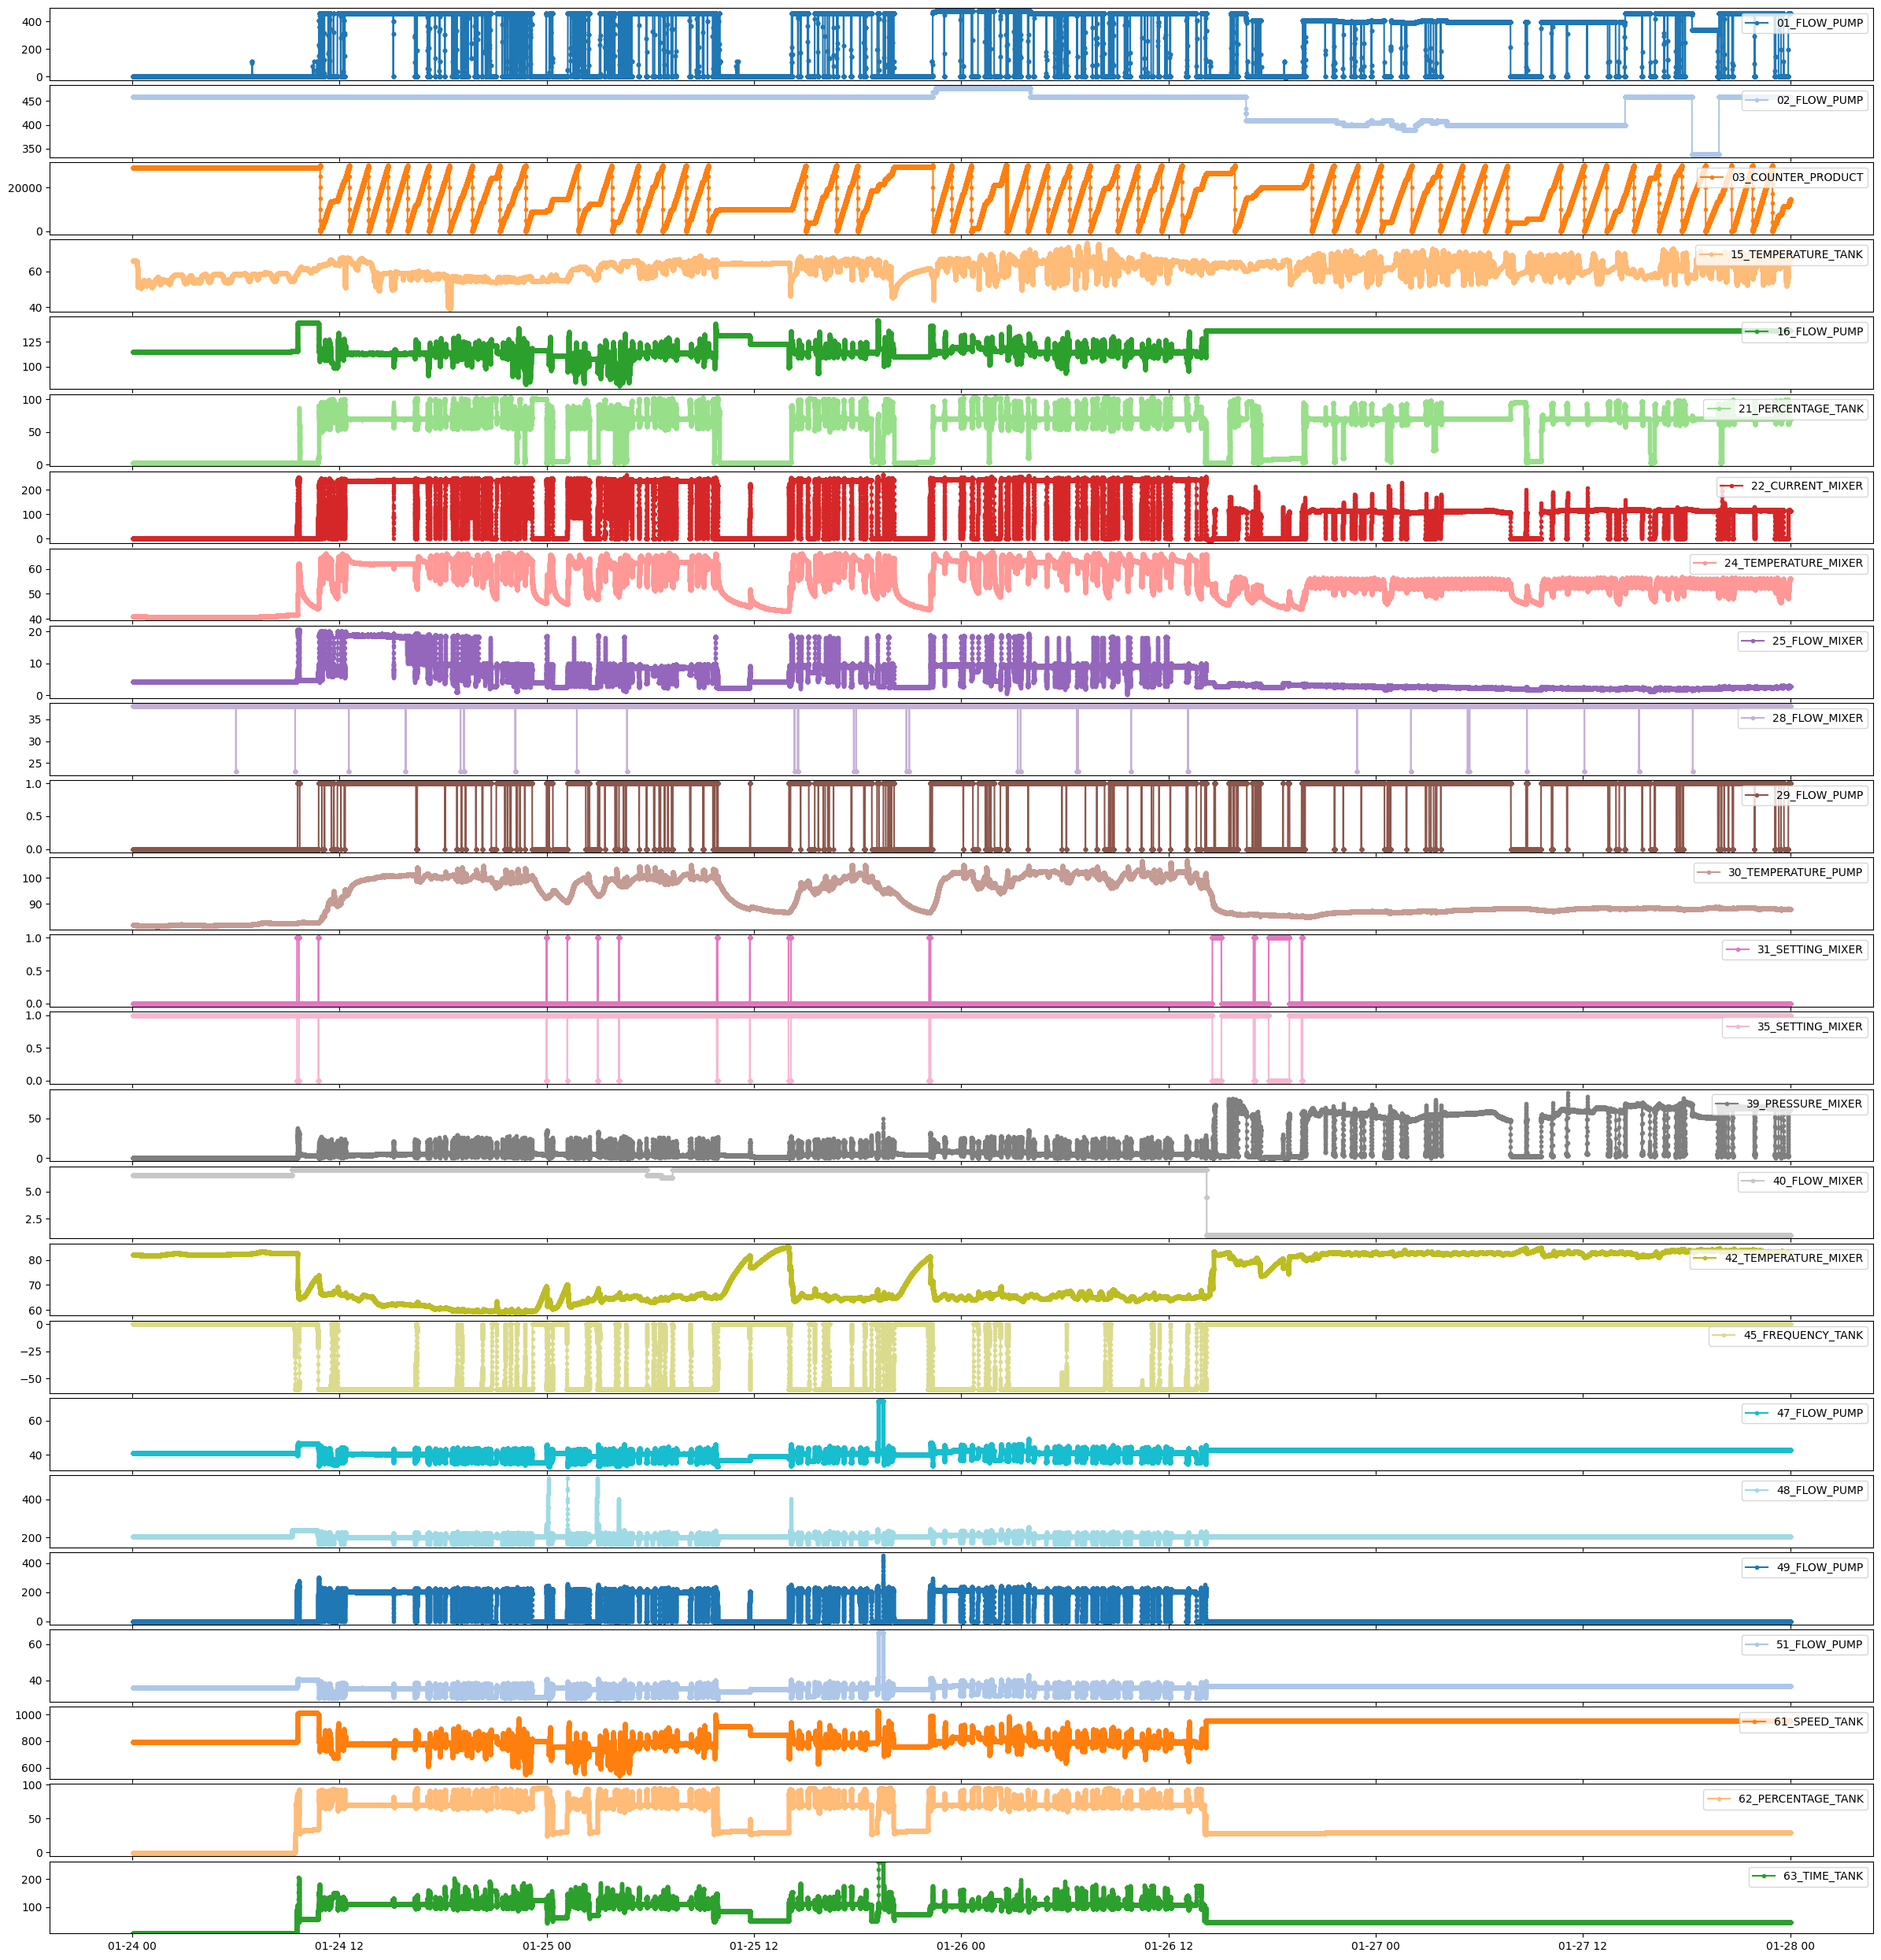

CPU times: user 1min 22s, sys: 1.05 s, total: 1min 23s
Wall time: 1min 23s


In [25]:
%%time
plot_overview(
    df_anon_high_res_interpolated,
    start="2022-01-24 00:00:00",
    end="2022-01-27 23:59:59",
    kind="line",
    normalize=False,
)

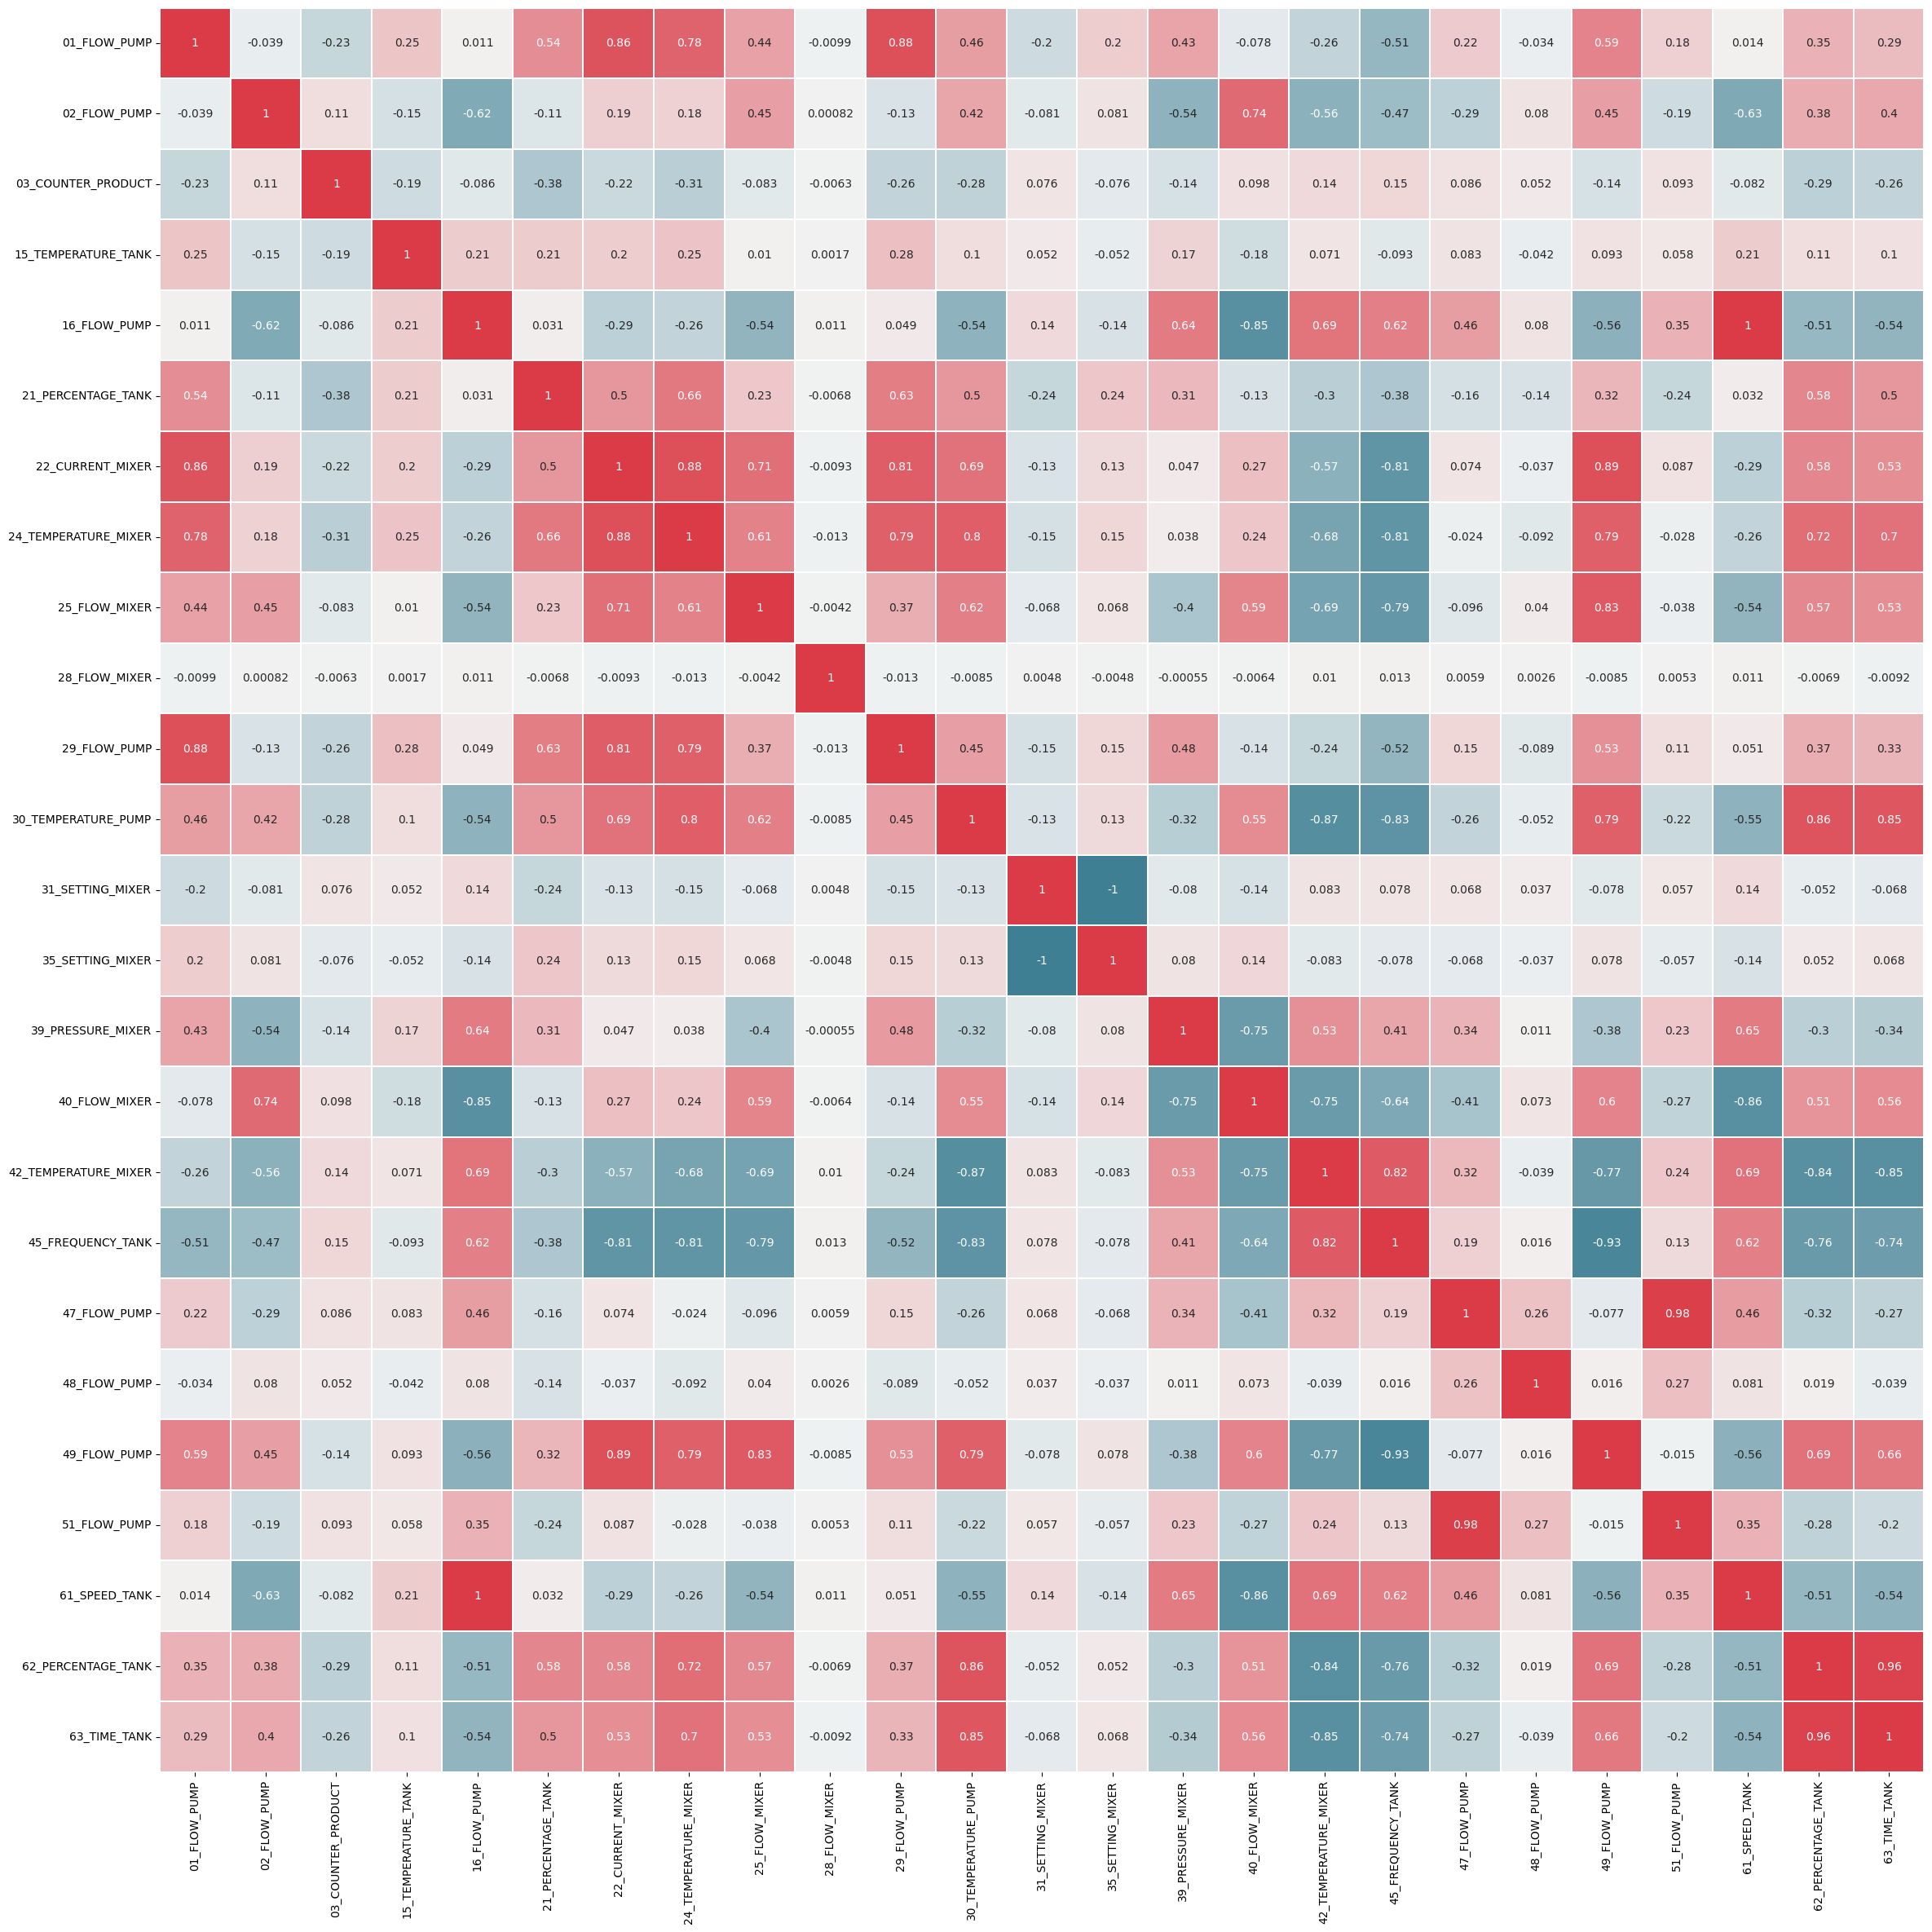

CPU times: user 1min 15s, sys: 1.68 s, total: 1min 17s
Wall time: 1min 16s


In [26]:
%%time
plot_correlation(
    df_anon_high_res_interpolated,
    subset=None,
    start="2022-01-24 00:00:00",
    end="2022-01-27 23:59:59",
    freq=None,
)

## 5.4 Modeling

### 5.4.1 Prepare data

In [27]:
def prepare_data(df, freq=None, normalize=False):
    # Pivot data
    df = df.pivot_table(index="timestamp", columns="sensor_tag", values="value")

    # Group data
    if freq:
        df = df.groupby(pd.Grouper(freq=freq)).mean()

    # Normalize data
    if normalize:
        scaler = MinMaxScaler()
        df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

    return df

In [28]:
%%time
X = prepare_data(df_anon_high_res_interpolated, freq="1min", normalize=True)

CPU times: user 6.39 s, sys: 1.38 s, total: 7.76 s
Wall time: 7.78 s


### 5.4.2 Segment data

In [29]:
ALGORITHMS = {
    "dynp": rpt.Dynp,
    "kcpd": rpt.KernelCPD,
    "binseg": rpt.Binseg,
    "bup": rpt.BottomUp,
    "win": rpt.Window,
}


def segment_data(X, algorithm="dynp", n_bkps=3, **kwargs):
    days = (X.index.max() - X.index.min()).days + 1

    if isinstance(algorithm, str):
        algorithm = [algorithm] * days
    if isinstance(n_bkps, int):
        n_bkps = [n_bkps] * days

    results = []
    offset = 0

    # Loop through days
    for idx in tqdm(range(days)):
        min_date = X.index.min() + pd.Timedelta(24 * idx, "hours")
        max_date = X.index.min() + pd.Timedelta(24 * (idx + 1), "hours")

        # Select subset
        X_subset = X[(X.index >= min_date) & (X.index <= max_date)]

        # Train model
        algo = ALGORITHMS[algorithm[idx]](**kwargs)
        y_pred = algo.fit_predict(X_subset, n_bkps=n_bkps[idx])

        # Append results
        results.append(np.array(y_pred) + offset)

        # Calculate offset
        offset = offset + len(X_subset) - 1

    return np.array(results).reshape(-1)


def plot_segments(X, segments, blocks=True, lines=True):
    rpt.display(
        X,
        segments if blocks else [],
        segments if lines else [],
        figsize=(24, 2 * len(X.columns)),
    )

In [30]:
%%time
segments = segment_data(X, algorithm="bup", n_bkps=6)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.31it/s]

CPU times: user 3.47 s, sys: 4.35 ms, total: 3.47 s
Wall time: 3.46 s


CPU times: user 2.04 s, sys: 1.74 s, total: 3.78 s
Wall time: 1.7 s


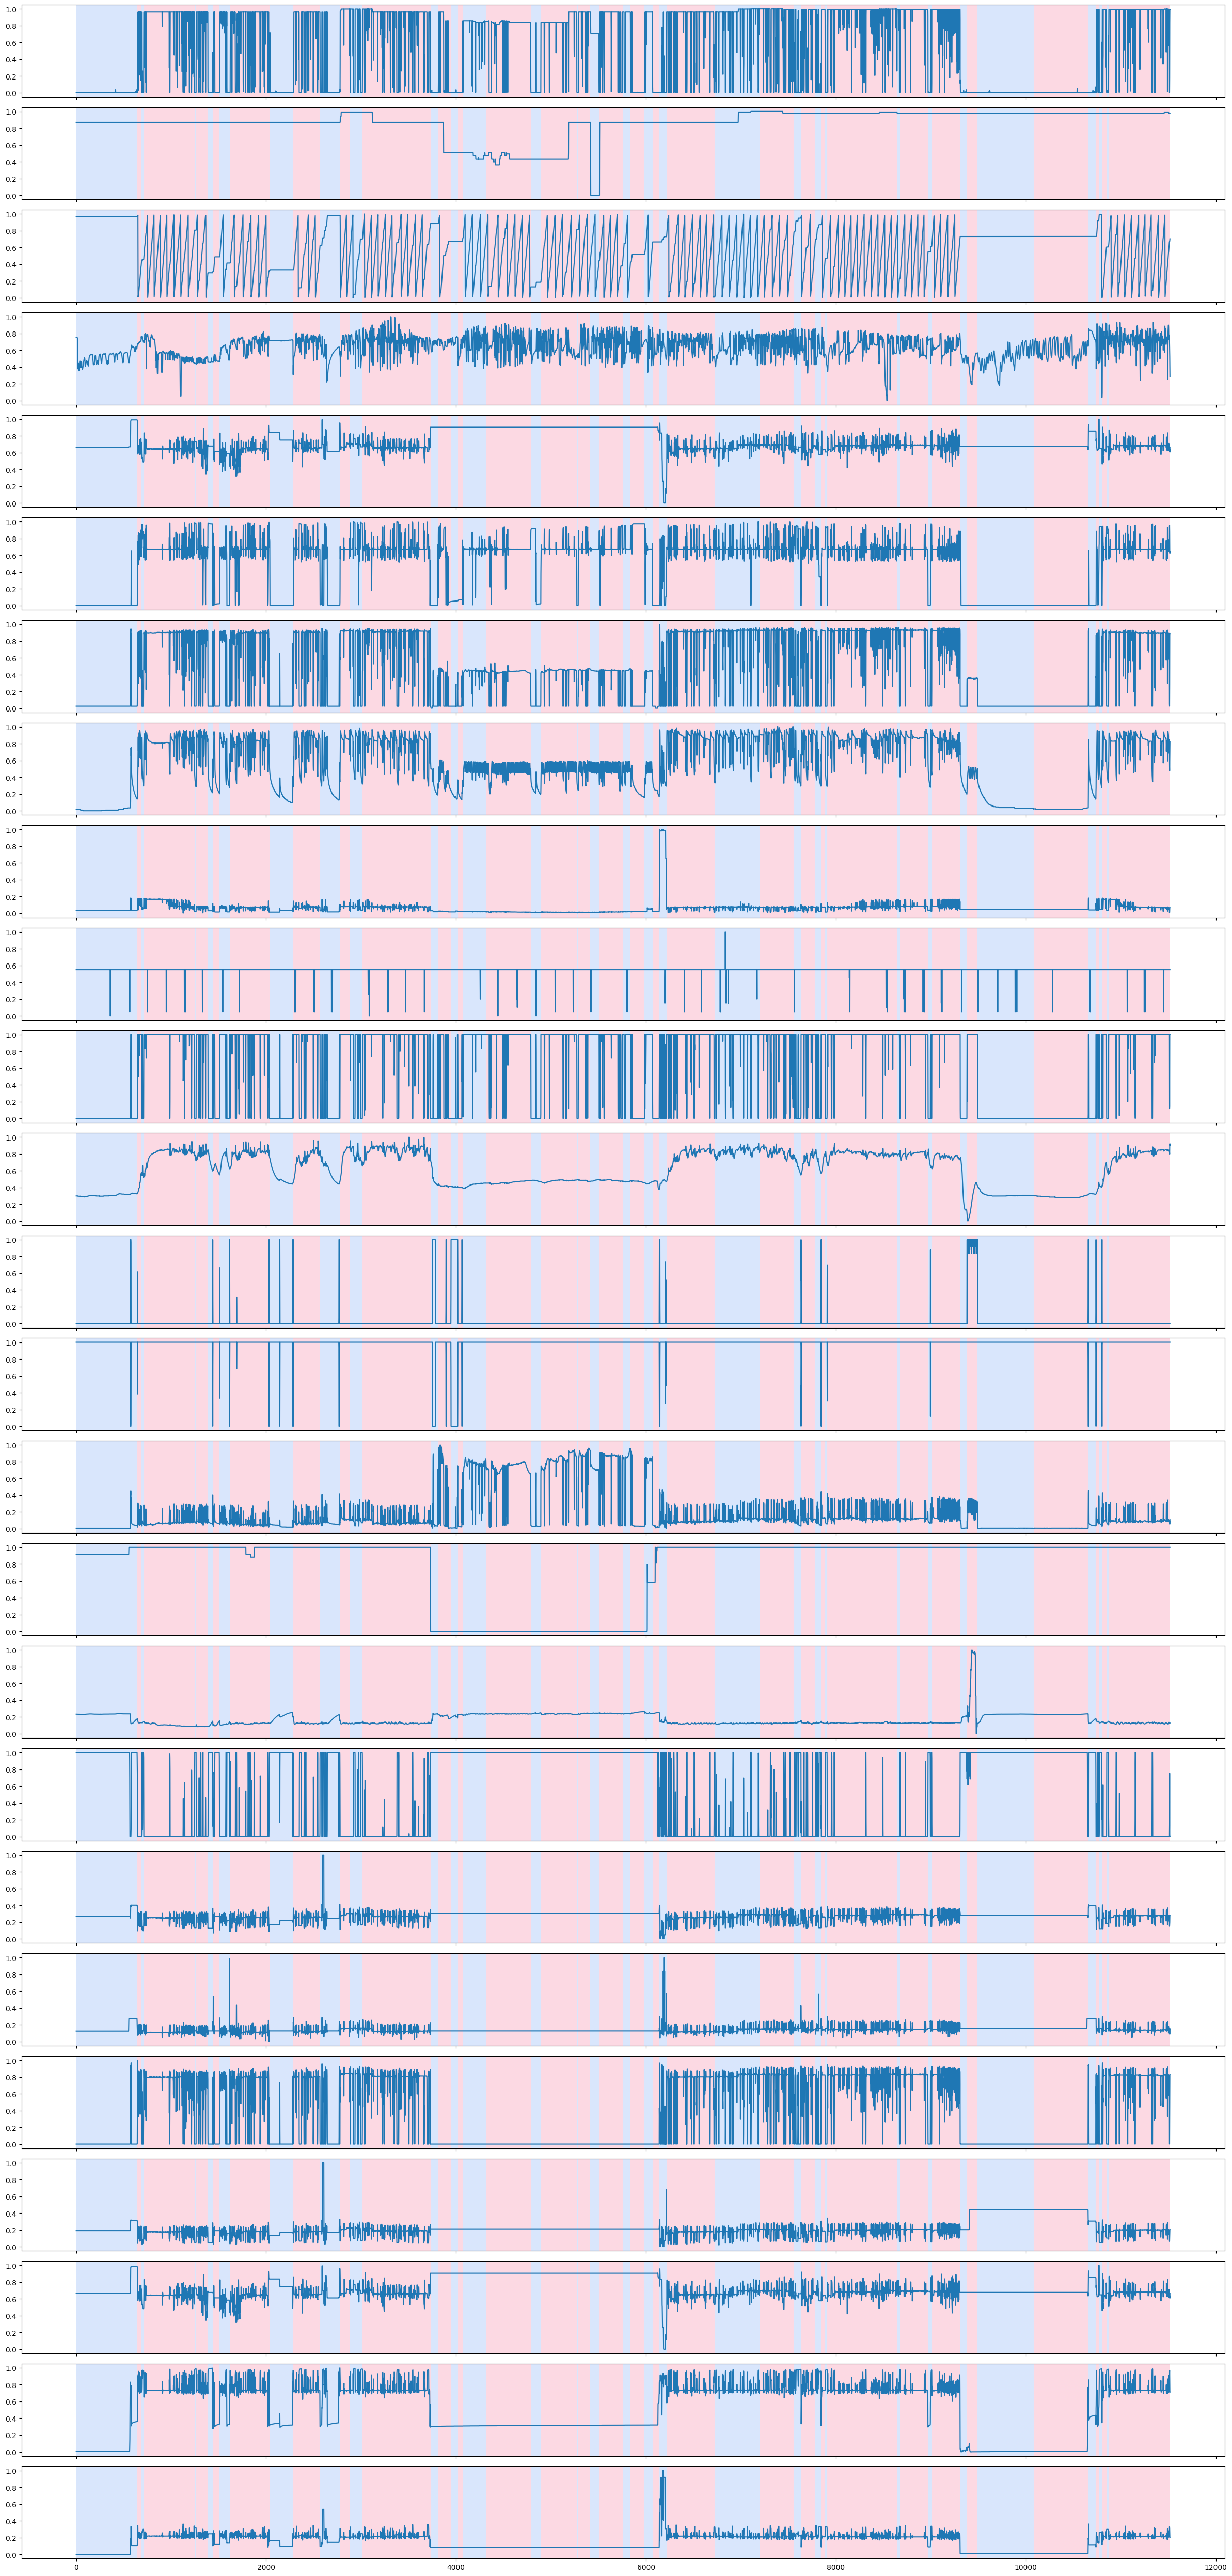

In [31]:
%%time
plot_segments(X, segments, blocks=True, lines=False)

### 5.4.3 Label data

In [32]:
def ask_question(question, options, enable_quit=False):
    answer = input(question).strip()

    if enable_quit and answer == "quit":
        return None

    if answer not in options:
        return ask_question(question, options, enable_quit=enable_quit)

    return answer


def label_data(X, y, segments, subset=None):
    # Copy data
    X_target = X.copy()

    # Create index
    X_target.index = pd.MultiIndex.from_tuples(
        zip(range(len(X)), X.index),
        names=["idx", "timestamp"],
    )

    # Create subset
    tags = subset if subset is not None else X_target.columns.to_list()

    # Create target
    X_target["TARGET"] = y.to_list() if y is not None else [np.nan] * len(X)

    # Loop through segments
    for idx in range(len(segments)):
        start_idx = segments[idx - 1] if idx > 0 else 0
        end_idx = segments[idx]
        start_date = X_target.index[start_idx][1]
        end_date = X_target.index[end_idx - 1][1]

        # Select subset
        X_subset = X_target.iloc[start_idx:end_idx]
        
        # Check already labeled
        if sum(X_subset["TARGET"].isnull()) == 0:
            continue

        # Plot subset
        _, axes = plt.subplots(len(tags), 1, figsize=(24, 2 * len(tags)), sharex=True, sharey=False)
        for ax, tag in zip(axes, tags):
            ax.plot(range(len(X_subset)), X_subset[tag], scalex=True, scaley=False)
            ax.axvline(x=0 - 0.5, color="k", linewidth=3, linestyle="--", alpha=1.0)
            ax.axvline(x=len(X_subset) - 0.5, color="k", linewidth=3, linestyle="--", alpha=1.0)
        plt.tight_layout()
        plt.show()

        # Print info
        print(TEXT_BOLD + "Progress: " + TEXT_END + f"{idx + 1}/{len(segments)}")
        print("")
        print(TEXT_BOLD + "Start Index: " + TEXT_END + f"{start_idx}")
        print(TEXT_BOLD + "End Index: " + TEXT_END + f"{end_idx}")
        print(TEXT_BOLD + "Start Date: " + TEXT_END + f"{start_date}")
        print(TEXT_BOLD + "End Date: " + TEXT_END + f"{end_date}")
        print("")
        print(TEXT_BOLD + "Options: " + TEXT_END)
        print("  * r: running (normal operation)")
        print("  * d: delay (production slowed down)")
        print("  * h: halted (production halted)")
        print("")

        # Request input
        options = ["r", "d", "h"]
        answer = ask_question("What label to use? [r/d/h]", options, enable_quit=True)

        if answer is None:
            break

        # Store output
        X_target.iloc[start_idx:end_idx, len(X_target.columns) - 1] = options.index(answer)

        # Clear output
        clear_output()

    return X_target["TARGET"]


def plot_labels(X, y):
    _, axes = plt.subplots(len(X.columns), 1, figsize=(24, 2 * len(X.columns)), sharex=True, sharey=False)
    colors = {0: "tab:green", 1: "tab:orange", 2: "tab:red"}
    segments = []

    prev_idx = 0
    prev_label = y.iloc[0].astype(int)
    for idx, value in enumerate(y):
        label = int(value) if not np.isnan(value) and not math.isnan(value) else None

        if label != prev_label or idx == len(y) - 1:
            segments.append((prev_idx, idx, prev_label))
            prev_idx = idx
            prev_label = label

    for ax, column in zip(axes, X.columns):
        ax.plot(range(len(X)), X[column])

        for (start, end, label) in segments:
            ax.axvspan(start - 0.5, end - 0.5, facecolor=colors[label], alpha=0.25)

    plt.tight_layout()
    plt.show()

In [33]:
%%time
# Load labels (if exist)
y = pd.read_csv(ANON_HIGH_RES_LABELS).squeeze("columns") if os.path.exists(ANON_HIGH_RES_LABELS) else None

# Label data
y = label_data(X, y, segments)

# # Save labels
y.to_csv(ANON_HIGH_RES_LABELS, index=False)

CPU times: user 62.9 ms, sys: 0 ns, total: 62.9 ms
Wall time: 62.7 ms


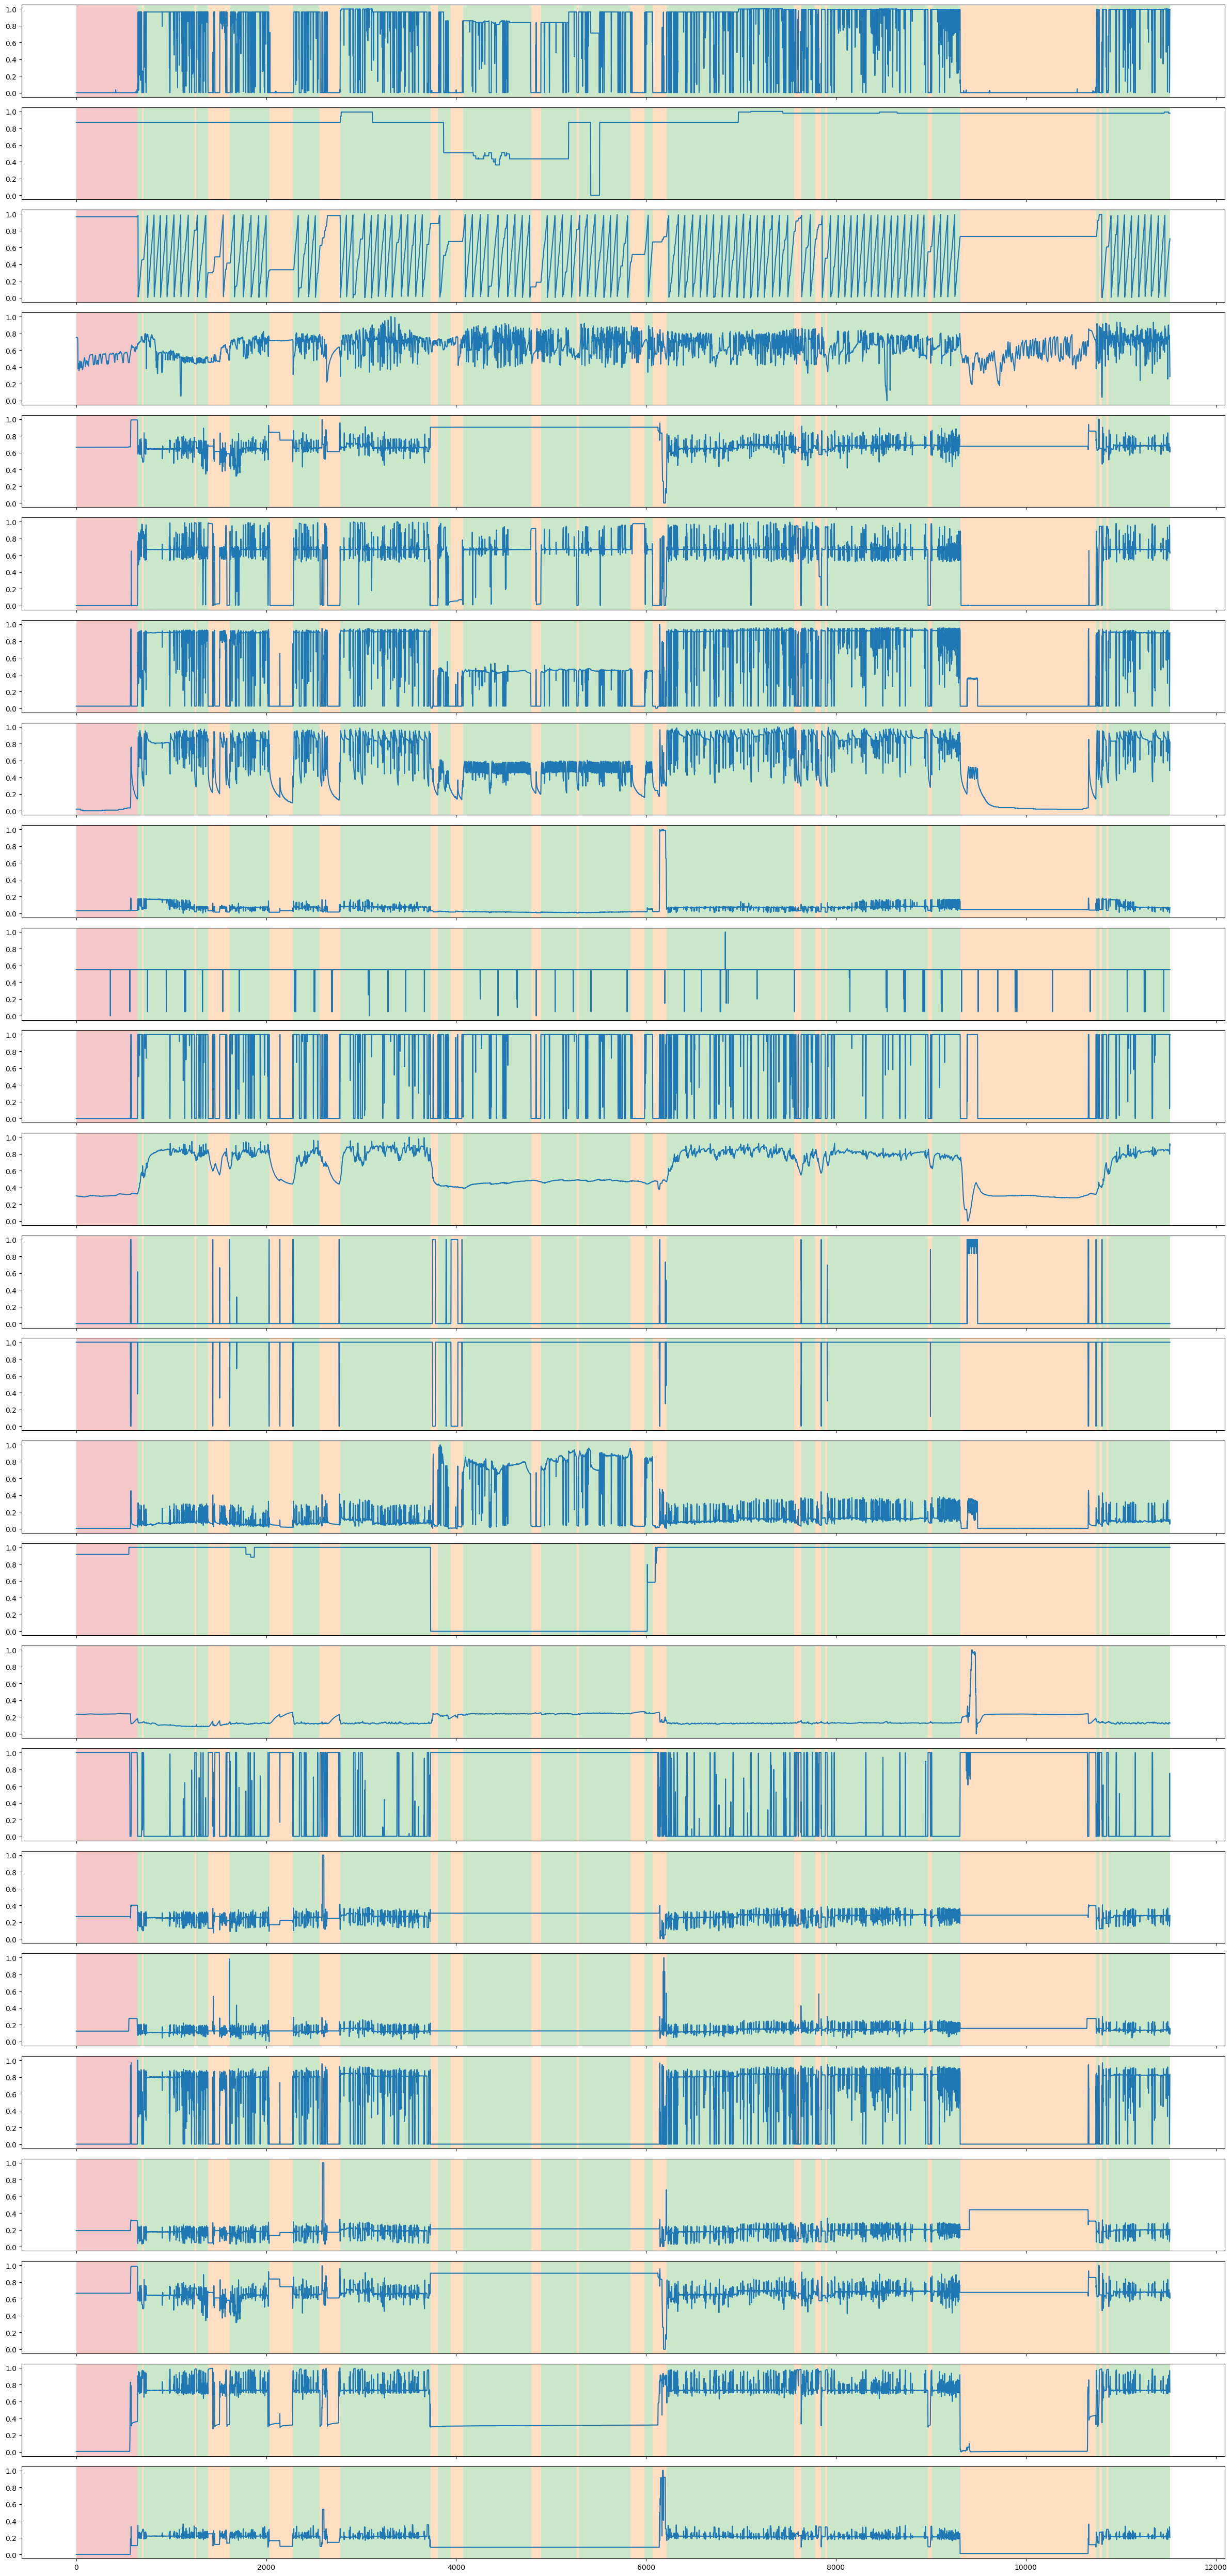

CPU times: user 4.77 s, sys: 1.39 s, total: 6.17 s
Wall time: 4.53 s


In [34]:
%%time
plot_labels(X, y)

### 5.4.4 Classify data

# 99. Scratch